In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt

In [ ]:
model_name = "HandwrittenDigitRecognition.h5"
shape_value = 28

In [ ]:
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

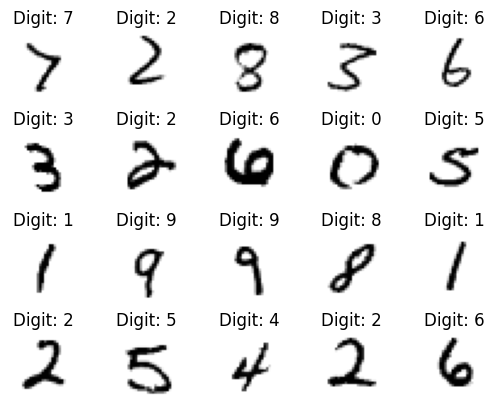

In [ ]:
i = 0
for rnd in [random.randint(1, len(train_img)) for nada in range(20)]:
  i += 1
  plt.subplot(4, 5, i)
  plt.imshow(train_img[rnd], cmap = 'gray_r')
  plt.title(f"Digit: {train_lab[rnd]}")
  plt.subplots_adjust(hspace = 0.5)
  plt.axis('off')

In [ ]:
print('Training images shape: ', train_img.shape)
print('Testing images shape: ', test_img.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


Text(0.5, 0, 'Intensity')

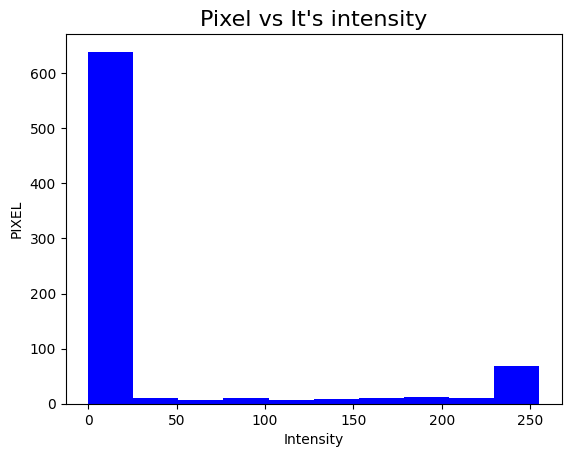

In [ ]:
plt.hist(train_img[0].reshape(784), facecolor = 'blue')
plt.title("Pixel vs It's intensity", fontsize = 16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [ ]:
# Normalizing mate!
train_img = train_img / 255.0
test_img = test_img / 255.0

Text(0.5, 0, 'Intensity')

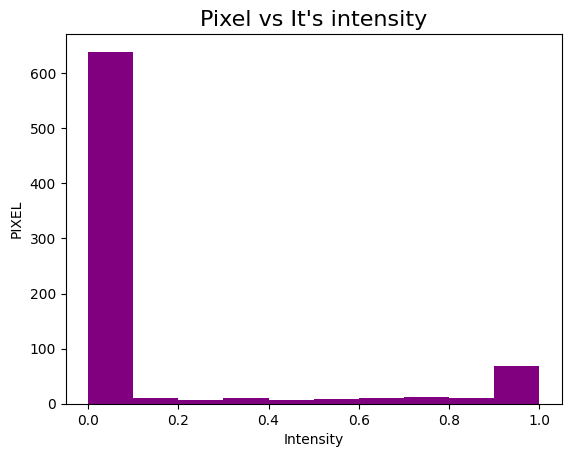

In [ ]:
plt.hist(train_img[0].reshape(784), facecolor = 'purple')
plt.title("Pixel vs It's intensity", fontsize = 16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (shape_value, shape_value)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_img, train_lab, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1821 - accuracy: 0.9453
Epoch 2/100
1057/1875 [===============>..............] - ETA: 2s - loss: 0.0799 - accuracy: 0.9755

*** WARNING: max output size exceeded, skipping output. ***

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 100/100
1/1 [==============================] - 0s 67ms/step
INFO:tensorflow:Assets written to: /tmp/tmp53sz9tdz/model/data/model/assets


In [ ]:
model.save(model_name)

In [ ]:
loss_and_acc = model.evaluate(test_img, test_lab, verbose = 1)
print("Test Loss: ", loss_and_acc[0])
print("Test Accuracy: ", loss_and_acc[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.9832
Test Loss:  0.47224971652030945
Test Accuracy:  0.9832000136375427


313/313 [==============================] - 0s 1ms/step
Predicted Value: 6
Successful prediction


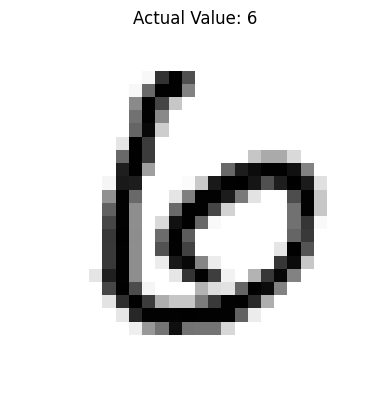

In [ ]:
plt.imshow(test_img[11], cmap = 'gray_r')
plt.title(f'Actual Value: {test_lab[11]}')
prediction = model.predict(test_img)
plt.axis('off')
print(f'Predicted Value: {np.argmax(prediction[11])}')
if(test_lab[11] == (np.argmax(prediction[11]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

## New Image Prediction Mate!!!

In [ ]:
def load_image(filename):
	img = load_img(filename, grayscale = True, target_size = (shape_value, shape_value))
	img = img_to_array(img)
	img = img.reshape(1, shape_value, shape_value)
	img = img.astype('float32')
	img = img / 255.0
	return img

1/1 [==============================] - 0s 65ms/step


/databricks/python/lib/python3.10/site-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


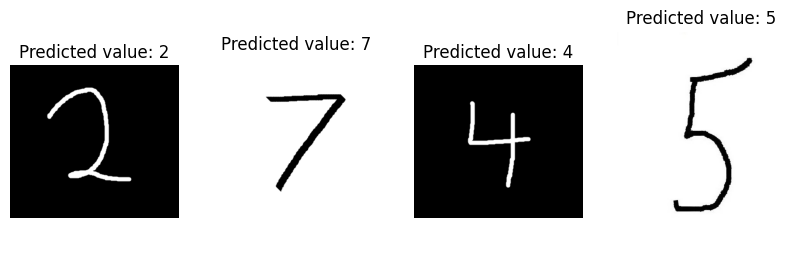

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (10, 10))
ax1.imshow(plt.imread("2img.png"))
ax1.set_title(f'Predicted value: {np.argmax(loaded_model.predict(load_image("2img.png")))}')
ax1.axis('off')
ax2.imshow(plt.imread("7img.png"))
ax2.set_title(f'Predicted value: {np.argmax(loaded_model.predict(load_image("7img.png")))}')
ax2.axis('off')
ax3.imshow(plt.imread("4img.png"))
ax3.set_title(f'Predicted value: {np.argmax(loaded_model.predict(load_image("4img.png")))}')
ax3.axis('off')
ax4.imshow(plt.imread("5img.jpeg"))
ax4.set_title(f'Predicted value: {np.argmax(loaded_model.predict(load_image("5img.jpeg")))}')
ax4.axis('off')
plt.show()